### Approach-1

In [4]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import re

In [21]:
df1 = pd.read_json("E:/Sem_7/Speech/Assignment_2/reviews_Sports_and_Outdoors_5.json/Sports_and_Outdoors_5.json", lines=True)
df1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"
...,...,...,...,...,...,...,...,...,...
296332,A2XX2A4OJCDNLZ,B00LFPS0CY,RatherLiveInKeyWest,"[2, 3]",This is a water bottle done right. It is a ver...,5,Hydracentials Sporty 25 Oz Stainless Steel Wat...,1405036800,"07 11, 2014"
296333,A3LGT6UZL99IW1,B00LFPS0CY,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",If you're looking for an insulated water bottl...,5,"Large, incredibly well made water bottle!",1405641600,"07 18, 2014"
296334,ASKZO80Z1RKTR,B00LFPS0CY,Robin Lee,"[0, 0]","This Hydracentials Sporty 25 OZ, double insula...",5,"""Great Water Bottle For Hot Day""......",1405900800,"07 21, 2014"
296335,APRNS6DB68LLV,B00LFPS0CY,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]",As usual I received this item free in exchange...,5,A pretty impressive water bottle. Best I've s...,1405900800,"07 21, 2014"


In [22]:
def preprocess_text(text):
    return simple_preprocess(re.sub(r'\W+', ' ', text.lower()))

In [23]:
df1['processed_reviews'] = df1['reviewText'].apply(preprocess_text)
sentences = df1['processed_reviews'].tolist()

In [24]:
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=2, workers=4, sg=0)

model.train(sentences, total_examples=model.corpus_count, epochs=10)

(182683096, 242993070)

In [25]:
similar_words = model.wv.most_similar('awful')
print(f"Words most similar to 'awful':\n{similar_words}")

Words most similar to 'awful':
[('horrible', 0.7615199089050293), ('terrible', 0.7363675832748413), ('overwhelming', 0.6314805150032043), ('ugly', 0.6082099080085754), ('horrendous', 0.5944315195083618), ('overpowering', 0.5936694145202637), ('unpleasant', 0.5848783254623413), ('lousy', 0.5787374377250671), ('insane', 0.5671796798706055), ('poor', 0.5660267472267151)]


In [26]:
similarity_good_great = model.wv.similarity('good', 'great')
similarity_slow_steady = model.wv.similarity('slow', 'steady')

print(f"Similarity between 'good' and 'great': {similarity_good_great}")
print(f"Similarity between 'slow' and 'steady': {similarity_slow_steady}")

Similarity between 'good' and 'great': 0.8109666109085083
Similarity between 'slow' and 'steady': 0.3111509084701538


### Approach-2

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
# Load the dataset
df1 = pd.read_json("E:/Sem_7/Speech/Assignment_2/reviews_Sports_and_Outdoors_5.json/Sports_and_Outdoors_5.json", lines=True)

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [30]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in stop_words]

# Apply preprocessing to the review texts
df1['processed_reviews'] = df1['reviewText'].apply(preprocess_text)

# Prepare the list of sentences
sentences = df1['processed_reviews'].tolist()

In [31]:
# Train the Word2Vec model
model = Word2Vec(
    sentences=sentences,
    vector_size=200,  # Increased vector size for more detailed embeddings
    window=10,        # Larger window size to capture more context
    min_count=2,      # Only include words that appear at least twice
    workers=4,        # Use 4 CPU cores for training
    sg=1,             # Use Skip-gram model
    epochs=20         # Train for more epochs to better learn the embeddings
)

In [32]:
# Train the model
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

# Save the model for future use
model.save("E:/Sem_7/Speech/Assignment_2/word2vec_sports_outdoors.model")

In [33]:
# Find words most similar to 'awful'
similar_words = model.wv.most_similar('awful')
print(f"Words most similar to 'awful':\n{similar_words}")

Words most similar to 'awful':
[('terrible', 0.6150670051574707), ('horrible', 0.6045835614204407), ('bad', 0.5590959787368774), ('riped', 0.4805739223957062), ('poor', 0.4721897542476654), ('doesthe', 0.45114895701408386), ('stevenson', 0.4299628436565399), ('worst', 0.4298325181007385), ('horribly', 0.42619723081588745), ('funny', 0.4260217249393463)]


In [34]:
# Calculate similarities between word pairs
similarity_good_great = model.wv.similarity('good', 'great')
similarity_slow_steady = model.wv.similarity('slow', 'steady')

print(f"Similarity between 'good' and 'great': {similarity_good_great}")
print(f"Similarity between 'slow' and 'steady': {similarity_slow_steady}")

Similarity between 'good' and 'great': 0.7676863670349121
Similarity between 'slow' and 'steady': 0.4557109475135803


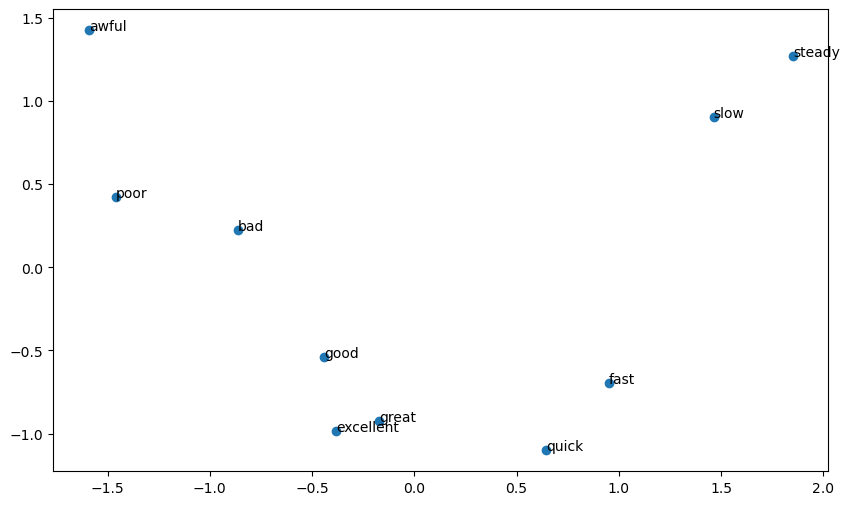

In [35]:
# Visualize word embeddings 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a sample of words for visualization
words = ['awful', 'good', 'great', 'slow', 'steady', 'excellent', 'poor', 'fast', 'quick', 'bad']
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()